In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

In [218]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [219]:
print(df.shape)

(17000, 9)


In [220]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [221]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


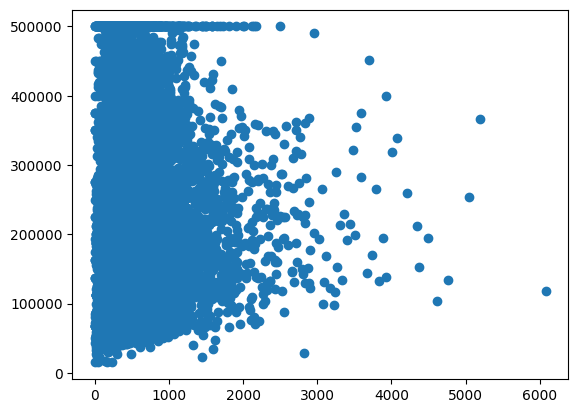

In [222]:
df_x = df['households']
df_y = df['median_house_value']
plt.plot(df_x, df_y, 'o')

In [223]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [224]:
df.columns.shape

(9,)

In [225]:
df.columns[8]

'median_house_value'

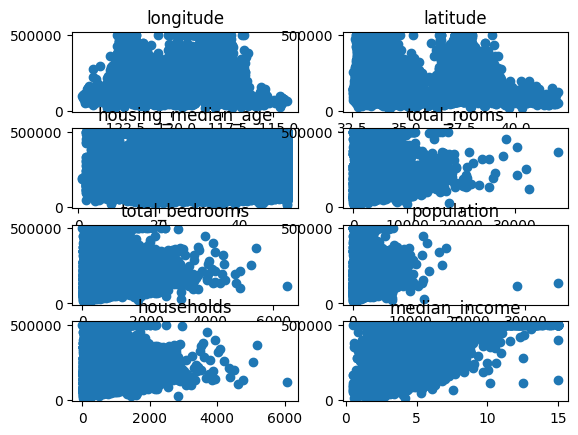

In [226]:
df_y = df['median_house_value']
i = 0
while i <= 7:
  df_x_i = df[df.columns[i]]
  plt.subplot(4, 2, i+1)
  plt.plot(df_x_i, df_y, 'o')
  plt.title(df.columns[i])
  i +=1
plt.show()

In [227]:
df_x = df.drop(labels=['median_house_value'], axis=1)

In [228]:
model = LinearRegression()

In [229]:
model.fit(df_x, df_y)

LinearRegression()

In [230]:
model.score(df_x, df_y)

0.6413378529502687

In [231]:
i = 0
df_y = df['median_house_value']
df_x = df.drop(labels=['median_house_value'], axis=1)
score_i = np.zeros(8)
while i <= 7:
  df_x_i = df_x.drop(labels=[df_x.columns[i]], axis=1)
  # print(df_x_i)
  model = LinearRegression()
  model.fit(df_x_i, df_y)
  score_i[i] = model.score(df_x_i, df_y)
  # print(score_i)
  i += 1


print(f" Accuracy of the model: {score_i}")
print(f"The maximum accuracy of the model is {max(score_i)} obtained by removing the feature \"{df_x.columns[score_i.argmax()]}\".")

 Accuracy of the model: [0.57832334 0.57140987 0.62899014 0.63934741 0.63639292 0.61910225
 0.64072684 0.38581735]
The maximum accuracy of the model is 0.6407268394704912 obtained by removing the feature "households".


In [235]:
# check
df_x_lon = df_x.drop(labels=['households'], axis=1)
model = LinearRegression()
model.fit(df_x_lon, df_y)
model.score(df_x_lon, df_y)
model.score(df_x_lon, df_y)

0.6407268394704912

In [236]:
i = 0
df_y = df['median_house_value']
df_x = df.drop(labels=['median_house_value'], axis=1)
score_ij = np.zeros((7, 8))
while i <= 6:
  j = i+1
  while j <= 7:
    df_x_ij = df_x.drop(labels=[df_x.columns[i], df_x.columns[j]], axis=1)
    model = LinearRegression()
    model.fit(df_x_ij, df_y)
    model.score(df_x_ij, df_y)
    score_ij[i, j] = model.score(df_x_ij, df_y)
    j += 1
  i += 1
# print(score_ij)
# print(type(score_ij))
# print(score_ij.shape)
# print(score_ij.argmax())
max_x = int(score_ij.argmax()/score_ij.shape[1])
max_y = score_ij.argmax()%score_ij.shape[1]
# print(max_x, max_y)
print(f" Accuracy matrix of the model: {score_ij}")
print(f"The maximum accuracy of the model is {score_ij.max()} obtained by removing the features \"{df_x.columns[max_x]}\" and \"{df_x.columns[max_y]}\".")

 Accuracy matrix of the model: [[0.         0.57134827 0.54257657 0.56959031 0.57561491 0.55632948
  0.57283627 0.19557655]
 [0.         0.         0.536283   0.55927692 0.56776201 0.55324734
  0.56660142 0.15940254]
 [0.         0.         0.         0.62633152 0.62474156 0.6054565
  0.628165   0.38365534]
 [0.         0.         0.         0.         0.63621608 0.61087779
  0.63865727 0.28293249]
 [0.         0.         0.         0.         0.         0.60628769
  0.61470737 0.3752053 ]
 [0.         0.         0.         0.         0.         0.
  0.61620717 0.32149523]
 [0.         0.         0.         0.         0.         0.
  0.         0.38205217]]
The maximum accuracy of the model is 0.6386572708923339 obtained by removing the features "total_rooms" and "households".


In [237]:
# check
df_x_th = df_x.drop(labels=['total_rooms', 'households'], axis=1)
model = LinearRegression()
model.fit(df_x_th, df_y)
model.score(df_x_th, df_y)
model.score(df_x_th, df_y)

0.6386572708923339